<a href="https://colab.research.google.com/github/vngeno/AUTOLIB-PARIS/blob/main/BLUECARS_IN_PARIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Define The Question

Is the sum of bluecars taken from postal code 75001 greater during weekdays or weekends?


1.) The Null hypothesis: The sum of bluecars taken from postal code 75001 during the weekdays is greater than or equal to the sum of those taken during the weekends.


2.) The Alternative hypothesis: The sum of bluecars taken from postal code 75001 is less during weekdays than weekends

##Metric of Success

Study will be considered successfull if the Null hypothesis is true

##Reading the Data

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
url = 'http://bit.ly/DSCoreAutolibDataset'
df_autolib = pd.read_csv(url)
df_autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [3]:
#Loading the glossary to get variable definitions
gloss = 'http://bit.ly/DSCoreAutolibDatasetGlossary'
gl = pd.read_excel(gloss)
gl

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
#Determining no of records in our dataset
df_autolib.shape

(16085, 13)

In [5]:
#Previewing the top of our dataset
df_autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
#Previewing the bottom of our dataset
df_autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


##Tidying the Dataset

In [7]:
#Checking for appropriate data types in our dataset
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
df_autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [9]:
df_autolib.rename(columns={"Postal code":"Postal_code"}, inplace=True)
df_autolib.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [10]:
df_autolib.describe()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [11]:
df_autolib.describe(include='all')

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/6/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [12]:
#Checking for missing values
df_autolib.isnull().sum()
#There are no missing values, which is good

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [13]:
#checking for duplicate records
df_autolib.duplicated().sum()
#There are no duplicate records

0

In [14]:
#checking for null values
df_autolib.isnull().sum()
#There are no null values

Postal_code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

#EXPLORATORY DATA ANALYSIS

##UNIVARIATE ANALYSIS

In [22]:
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [23]:
df_autolib.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


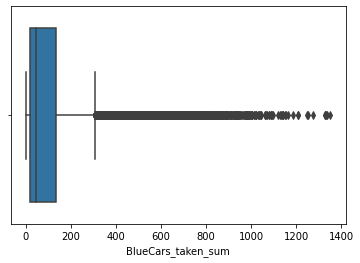

In [40]:
#Checking for outliers in the relevant columns
sns.boxplot(df_autolib['BlueCars_taken_sum'])
#This shows numerous outliers 



In [42]:
#Checking for the number of outliers in the BlueCars taken column
Q1 = df_autolib['BlueCars_taken_sum'].quantile(.25)
Q3 = df_autolib['BlueCars_taken_sum'].quantile(.75)

IQR = Q3 - Q1

output = ((df_autolib['BlueCars_taken_sum'] < Q1 - 1.5*IQR) | (df_autolib['BlueCars_taken_sum'] > Q3 + 1.5*IQR))
output.value_counts()

False    13870
True      2215
Name: BlueCars_taken_sum, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


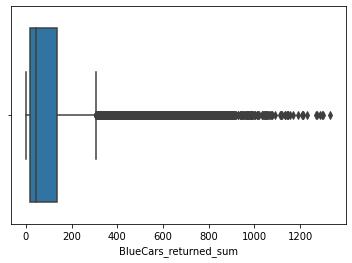

In [44]:
#Checking for outliers in the BlueCars returned column 
sns.boxplot(df_autolib['BlueCars_returned_sum']);

In [45]:
#Checking for the number of outliers in the BlueCars returned column
Q1 = df_autolib['BlueCars_returned_sum'].quantile(.25)
Q3 = df_autolib['BlueCars_returned_sum'].quantile(.75)

IQR = Q3 - Q1

output1 = ((df_autolib['BlueCars_returned_sum'] < Q1 - 1.5*IQR) | (df_autolib['BlueCars_returned_sum'] > Q3 + 1.5*IQR))
output1.value_counts()


False    13872
True      2213
Name: BlueCars_returned_sum, dtype: int64

From the above, the number of outliers in the columns is a lot and removing them will give inconclusive results in during the analysis. Hence, we will work with the outliers.

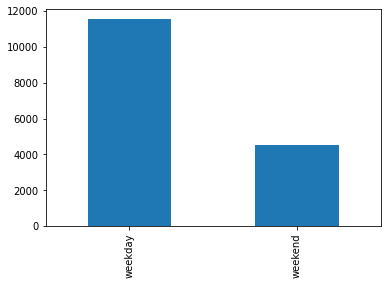

In [47]:
df_autolib['day_type'].value_counts().plot.bar()

In [62]:
df_autolib['Postal_code'].value_counts(ascending =False)
#The most popular postal code is 94130 and the least popular is 93390

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal_code, Length: 104, dtype: int64

In [68]:
#Range of numeric data
print('Range of Bluecars Taken: ' + str(df_autolib['BlueCars_taken_sum'].max() - df_autolib['BlueCars_taken_sum'].min()))
print('Range of Bluecars Returned: ' +str(df_autolib['BlueCars_returned_sum'].max() - df_autolib['BlueCars_returned_sum'].min()))
print('Range of slots freed: ' +str(df_autolib['Slots_freed_sum'].max() - df_autolib['Slots_freed_sum'].min()))
print('Range of slots taken: ' +str(df_autolib['Slots_taken_sum'].max() - df_autolib['Slots_taken_sum'].min()))

Range of Bluecars Taken: 1352
Range of Bluecars Returned: 1332
Range of slots freed: 360
Range of slots taken: 359


In [70]:
#Standard deviation of numeric data
print('Standard Deviation of Bluecars Taken: ' + str(df_autolib['BlueCars_taken_sum'].std()))
print('Standard Deviation of Bluecars Returned: ' +str(df_autolib['BlueCars_returned_sum'].std()))
print('Standard Deviation of slots freed: ' +str(df_autolib['Slots_freed_sum'].std()))
print('Standard Deviation of slots taken: ' +str(df_autolib['Slots_taken_sum'].std()))

Standard Deviation of Bluecars Taken: 185.42657876727893
Standard Deviation of Bluecars Returned: 185.50153480148427
Standard Deviation of slots freed: 52.12026333757879
Standard Deviation of slots taken: 52.146029870452566


In [71]:
#Variance of the numeric data
print('Variance of Bluecars Taken: ' + str(df_autolib['BlueCars_taken_sum'].var()))
print('Variance of Bluecars Returned: ' +str(df_autolib['BlueCars_returned_sum'].var()))
print('Variance of slots freed: ' +str(df_autolib['Slots_freed_sum'].var()))
print('Variance of slots taken: ' +str(df_autolib['Slots_taken_sum'].var()))

Variance of Bluecars Taken: 34383.01611333789
Variance of Bluecars Returned: 34410.819413706275
Variance of slots freed: 2716.52185037856
Variance of slots taken: 2719.2084312501315


In [72]:
#Skewness of the numeric data
print('Skewness of Bluecars Taken: ' + str(df_autolib['BlueCars_taken_sum'].skew()))
print('Skewness of Bluecars Returned: ' +str(df_autolib['BlueCars_returned_sum'].skew()))
print('Skewness of slots freed: ' +str(df_autolib['Slots_freed_sum'].skew()))
print('Skewness of slots taken: ' +str(df_autolib['Slots_taken_sum'].skew()))

Skewness of Bluecars Taken: 2.4063548974959086
Skewness of Bluecars Returned: 2.412084978838923
Skewness of slots freed: 2.5974057870090994
Skewness of slots taken: 2.5969043474634987


Positive values indicate that the tail of the data is right-skewed

In [73]:
#Kurtosis of the numeric data
print('Kurtosis of Bluecars Taken: ' + str(df_autolib['BlueCars_taken_sum'].kurt()))
print('Kurtosis of Bluecars Returned: ' +str(df_autolib['BlueCars_returned_sum'].kurt()))
print('Kurtosis of slots freed: ' +str(df_autolib['Slots_freed_sum'].kurt()))
print('Kurtosis of slots taken: ' +str(df_autolib['Slots_taken_sum'].kurt()))

Kurtosis of Bluecars Taken: 6.172692305510042
Kurtosis of Bluecars Returned: 6.1862880957582345
Kurtosis of slots freed: 6.454514382612528
Kurtosis of slots taken: 6.442553073772169


From the above, the kurtosis is leptokurtic and indicates a positive excess kurtosis. The leptokurtic distribution shows heavy tails on either side, indicating large outliers. An investment whose returns follow a leptokurtic distribution is considered to be risky.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

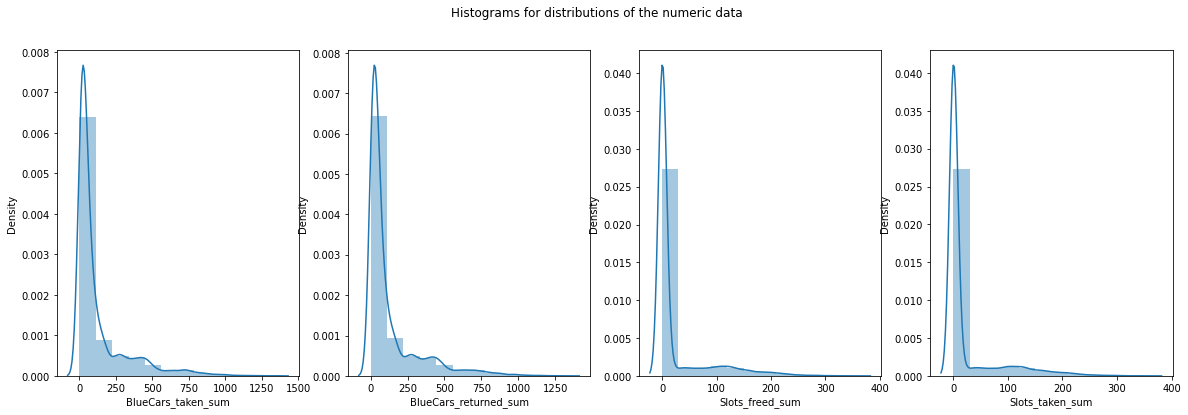

In [81]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,6))
bins = 12
fig.suptitle('Histograms for distributions of the numeric data')
sns.distplot(df_autolib['BlueCars_taken_sum'], ax=ax1, bins=bins)
sns.distplot(df_autolib['BlueCars_returned_sum'], ax=ax2, bins=bins)
sns.distplot(df_autolib['Slots_freed_sum'], ax=ax3, bins=bins)
sns.distplot(df_autolib['Slots_taken_sum'], ax=ax4, bins=bins)


The above shows the distribution is not normal because of the many outliers 

##Bivariate Analysis

In [82]:
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [87]:
#Checking for correlation between the numeric data
#First selecting the columns
cols = ['BlueCars_taken_sum','BlueCars_returned_sum','Slots_freed_sum','Slots_taken_sum']
num_cols = df_autolib[cols]
num_cols.head()


,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,110,103,22,20
1,98,94,23,22
2,138,139,27,27
3,104,104,25,21
4,114,117,18,20


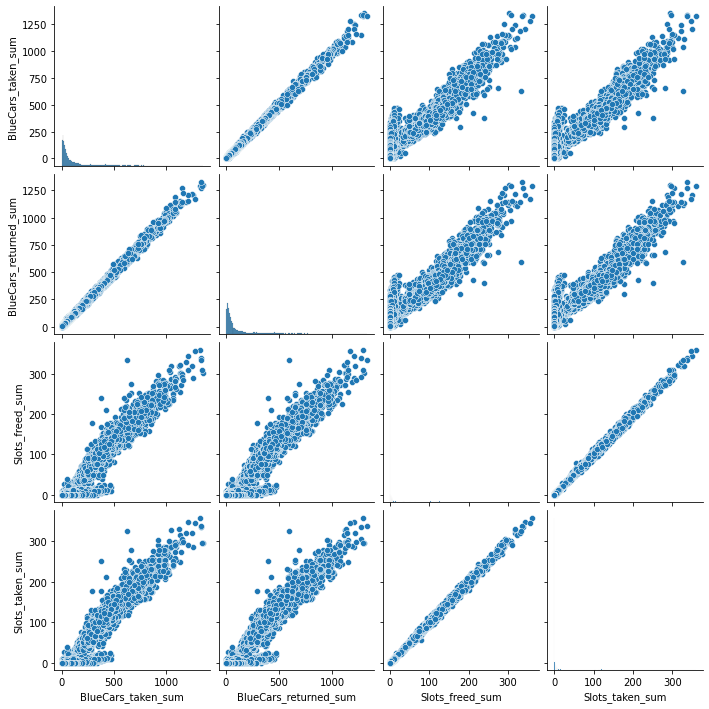

In [88]:
#using a seaborn pairplot to check correlation
sns.pairplot(num_cols)
#This shows positive correlation between the numerical variables. 

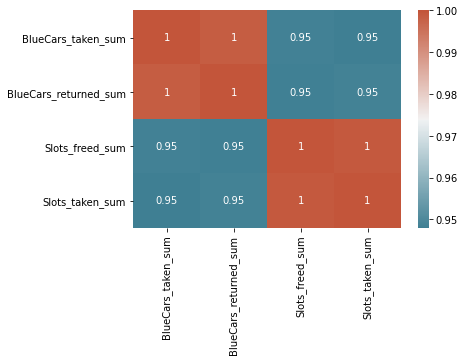

In [89]:
#Using a heatmap to check correlation
corr = num_cols.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

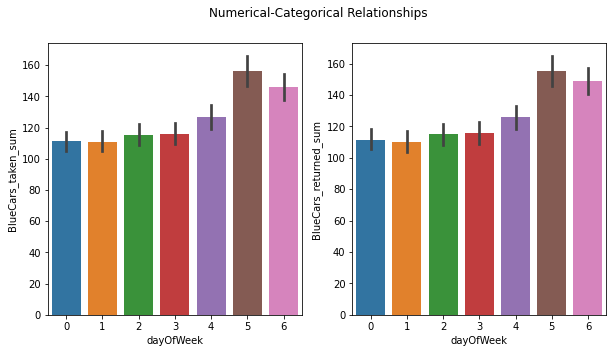

In [91]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Numerical-Categorical Relationships')
sns.barplot(x= df_autolib['dayOfWeek'], y=df_autolib['BlueCars_taken_sum'], ax=ax1)
sns.barplot(x= df_autolib['dayOfWeek'], y=df_autolib['BlueCars_returned_sum'], ax=ax2)

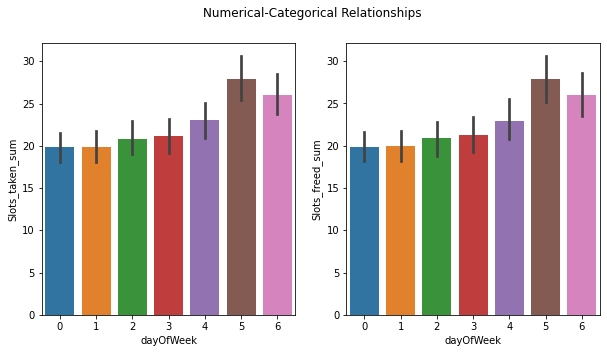

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Numerical-Categorical Relationships')
sns.barplot(x= df_autolib['dayOfWeek'], y=df_autolib['Slots_taken_sum'], ax=ax1)
sns.barplot(x= df_autolib['dayOfWeek'], y=df_autolib['Slots_freed_sum'], ax=ax2)

From the above, we can see that generally Saturday is the busiest for taking and returning bluecars whilst the weekdays are not so busy. Earlier in the univariate analysis, we found that weekdays were busier and that could be because we have more weekdays than weekends.

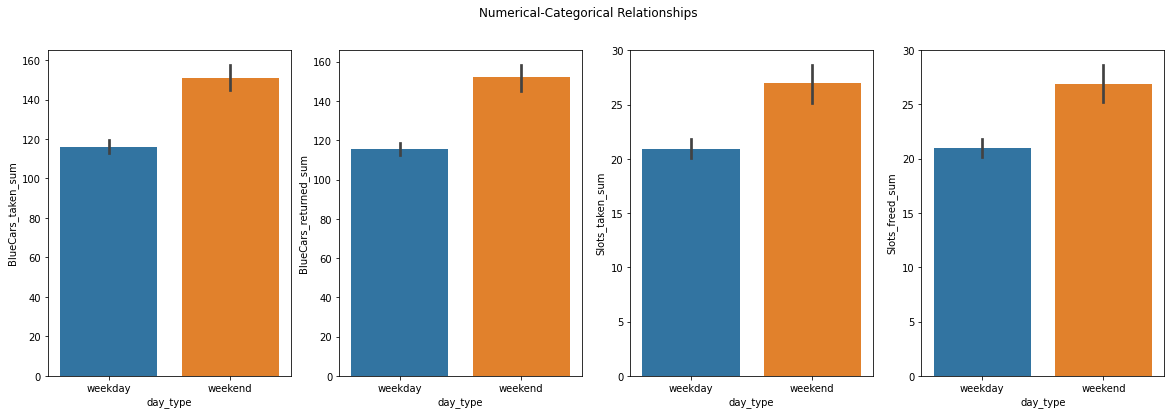

In [97]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,6))
fig.suptitle('Numerical-Categorical Relationships')
sns.barplot(x= df_autolib['day_type'], y=df_autolib['BlueCars_taken_sum'], ax=ax1)
sns.barplot(x= df_autolib['day_type'], y=df_autolib['BlueCars_returned_sum'], ax=ax2)
sns.barplot(x= df_autolib['day_type'], y=df_autolib['Slots_taken_sum'], ax=ax3)
sns.barplot(x= df_autolib['day_type'], y=df_autolib['Slots_freed_sum'], ax=ax4)

#HYPOTHESIS TESTING

1.) The Null hypothesis: The sum of bluecars taken from postal code 75001 during the weekdays is greater than or equal to the sum of those taken during the weekends.

2.) The Alternative hypothesis: The sum of bluecars taken from postal code 75001 is less during weekdays than weekends

##SAMPLING


In [140]:
#Selecting our target population
col = df_autolib[df_autolib["Postal_code"] == 75001]
col

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,75001,6/15/2018,1440,4,weekday,150,150,5,5,3,3,20,22
152,75001,6/16/2018,1440,5,weekend,203,206,7,7,18,18,35,34
153,75001,6/17/2018,1440,6,weekend,175,174,7,7,8,9,20,20
154,75001,6/18/2018,1440,0,weekday,122,120,6,6,12,11,22,22


In [144]:
#Selecting weekends only 
weekend = col[col["day_type"] == "weekend"]
weekend.value_counts().sum()

44

In [145]:
weekday = col[col["day_type"] == "weekday"]
weekday.value_counts().sum()

112

In [194]:
#Creating a stratified sample
Sample = col.groupby('day_type', group_keys=False).apply(lambda x: x.sample(30, random_state=20))
Sample
#Creating a proportion of the non-stratified sample
print(Sample['day_type'].value_counts())
#Checking stratified output
print(Sample)

weekend    30
weekday    30
Name: day_type, dtype: int64
     Postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
76         75001  3/21/2018  ...               24               24
70         75001  3/15/2018  ...               22               21
1          75001   1/2/2018  ...               23               22
120        75001   5/4/2018  ...               16               18
64         75001   3/9/2018  ...               20               18
68         75001  3/13/2018  ...               19               18
149        75001  6/13/2018  ...               12               13
7          75001   1/8/2018  ...               14               15
2          75001   1/3/2018  ...               27               27
140        75001   6/4/2018  ...               11               11
53         75001  2/23/2018  ...               17               18
128        75001  5/23/2018  ...               13               11
110        75001  4/24/2018  ...               13               14
141  

In [191]:
population_mean = df_autolib['BlueCars_taken_sum'].mean()
population_deviation = df_autolib['BlueCars_taken_sum'].std()
sample_mean = Sample['BlueCars_taken_sum'].mean()
sample_deviation = Sample['BlueCars_taken_sum'].std()

print(population_mean, population_deviation, sample_mean, sample_deviation)


125.92695057506994 185.42657876727893 152.65 41.08874073739198


In [192]:
z_score = (sample_mean - population_mean) / population_deviation
z_score

0.1441166072446876

In [199]:
#Test Sensitivity
#This measures the effect of changing the sample size
Sample = col.groupby('day_type', group_keys=False).apply(lambda x: x.sample(40, random_state=10))
Sample
print(Sample['day_type'].value_counts())
print(Sample)

weekend    40
weekday    40
Name: day_type, dtype: int64
     Postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
143        75001   6/7/2018  ...               20               18
127        75001  5/22/2018  ...               30               32
104        75001  4/18/2018  ...               16               17
67         75001  3/12/2018  ...               15               17
74         75001  3/19/2018  ...               16               17
..           ...        ...  ...              ...              ...
33         75001   2/3/2018  ...               34               37
132        75001  5/27/2018  ...               29               28
107        75001  4/21/2018  ...               33               33
93         75001   4/7/2018  ...               47               48
101        75001  4/15/2018  ...               34               33

[80 rows x 13 columns]


In [201]:
population_mean = df_autolib['BlueCars_taken_sum'].mean()
population_deviation = df_autolib['BlueCars_taken_sum'].std()
sample_mean = Sample['BlueCars_taken_sum'].mean()
sample_deviation = Sample['BlueCars_taken_sum'].std()

print(population_mean, population_deviation, sample_mean, sample_deviation)

125.92695057506994 185.42657876727893 149.55 41.92727277717507


In [202]:
z_score = (sample_mean - population_mean) / population_deviation
z_score

0.12739839985171902

The z score is greater than the confidence interval(0.05) hence the null hypothesis is taken to be true, this means, the sum of bluecars taken from postal code 75001 during the weekdays is greater than or equal to the sum of those taken during the weekends.